# Data Exploration

Exploring the format of the HRRR output files so that we can find:

1. Vertically integrated smoke mass density (`MASSDEN`) for a given time over the Continental United States (CONUS)
2. Vertical cross-section of smoke mass density at a single grid cell for constructing a vertical cross-section along a path

## Data Source

The sample data used in this notebook can be downloaded from our [S3 bucket](https://s3.console.aws.amazon.com/s3/buckets/gsl-atd-smoke-vis?region=us-east-1&prefix=smoke/&showversions=false) and put in your `work/data/` folder.

Additional HRRR output is available here: https://nomads.ncep.noaa.gov/pub/data/nccf/com/

### Naming Conventions

- **nat** native grid
- **prs** pressure grid
- **sfc** surface variables only (although sometimes includes a couple vertical ones)
- **para** parallel run
- **prod** production
- **exp** experimental

The file names include the initialization time of the model run and the current forecast hour as an offset from the initialization time. For example, `hrrr.t00z.wrfnatf09.grib2` is output from the HRRR (`hrrr`), the initialization is 00:00GMT (`t00z`), the data is on native grid coordinates (wrfnat), and the forecast if for the ninth hour after the initialization time, _i.e._ 09:00GMT (`f09`).

In [1]:
import seaborn as sns
import xarray as xr

In [2]:
t17z_f00 = xr.open_rasterio("data/hrrr.t17z.wrfnatf00.grib2")
t17z_f00

<xarray.DataArray (band: 1133, y: 1059, x: 1799)>
[2158524753 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7 8 ... 1127 1128 1129 1130 1131 1132 1133
  * y        (y) float64 1.587e+06 1.584e+06 1.581e+06 ... -1.584e+06 -1.587e+06
  * x        (x) float64 -2.698e+06 -2.695e+06 ... 2.693e+06 2.696e+06
Attributes:
    transform:     (3000.0, 0.0, -2699020.1425219304, 0.0, -3000.0, 1588193.8...
    crs:           +proj=lcc +lat_0=38.5 +lon_0=262.5 +lat_1=38.5 +lat_2=38.5...
    res:           (3000.0, 3000.0)
    is_tiled:      0
    nodatavals:    (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na...
    scales:        (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....
    offsets:       (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
    descriptions:  ('1[-] HYBL="Hybrid level"', '1[-] HYBL="Hybrid level"', '...

In [3]:
t17z_f00[20]

<xarray.DataArray (y: 1059, x: 1799)>
[1905141 values with dtype=float64]
Coordinates:
    band     int64 21
  * y        (y) float64 1.587e+06 1.584e+06 1.581e+06 ... -1.584e+06 -1.587e+06
  * x        (x) float64 -2.698e+06 -2.695e+06 ... 2.693e+06 2.696e+06
Attributes:
    transform:     (3000.0, 0.0, -2699020.1425219304, 0.0, -3000.0, 1588193.8...
    crs:           +proj=lcc +lat_0=38.5 +lon_0=262.5 +lat_1=38.5 +lat_2=38.5...
    res:           (3000.0, 3000.0)
    is_tiled:      0
    nodatavals:    (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na...
    scales:        (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....
    offsets:       (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
    descriptions:  ('1[-] HYBL="Hybrid level"', '1[-] HYBL="Hybrid level"', '...

(array([1.90496e+06, 1.44000e+02, 2.50000e+01, 4.00000e+00, 2.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([1.17746262e-16, 2.42580005e+02, 4.85160010e+02, 7.27740015e+02,
        9.70320020e+02, 1.21290002e+03, 1.45548003e+03, 1.69806003e+03,
        1.94064004e+03, 2.18322004e+03, 2.42580005e+03]),
 <BarContainer object of 10 artists>)

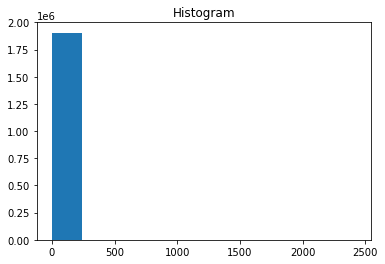

In [4]:
t17z_f00[19].plot.hist()

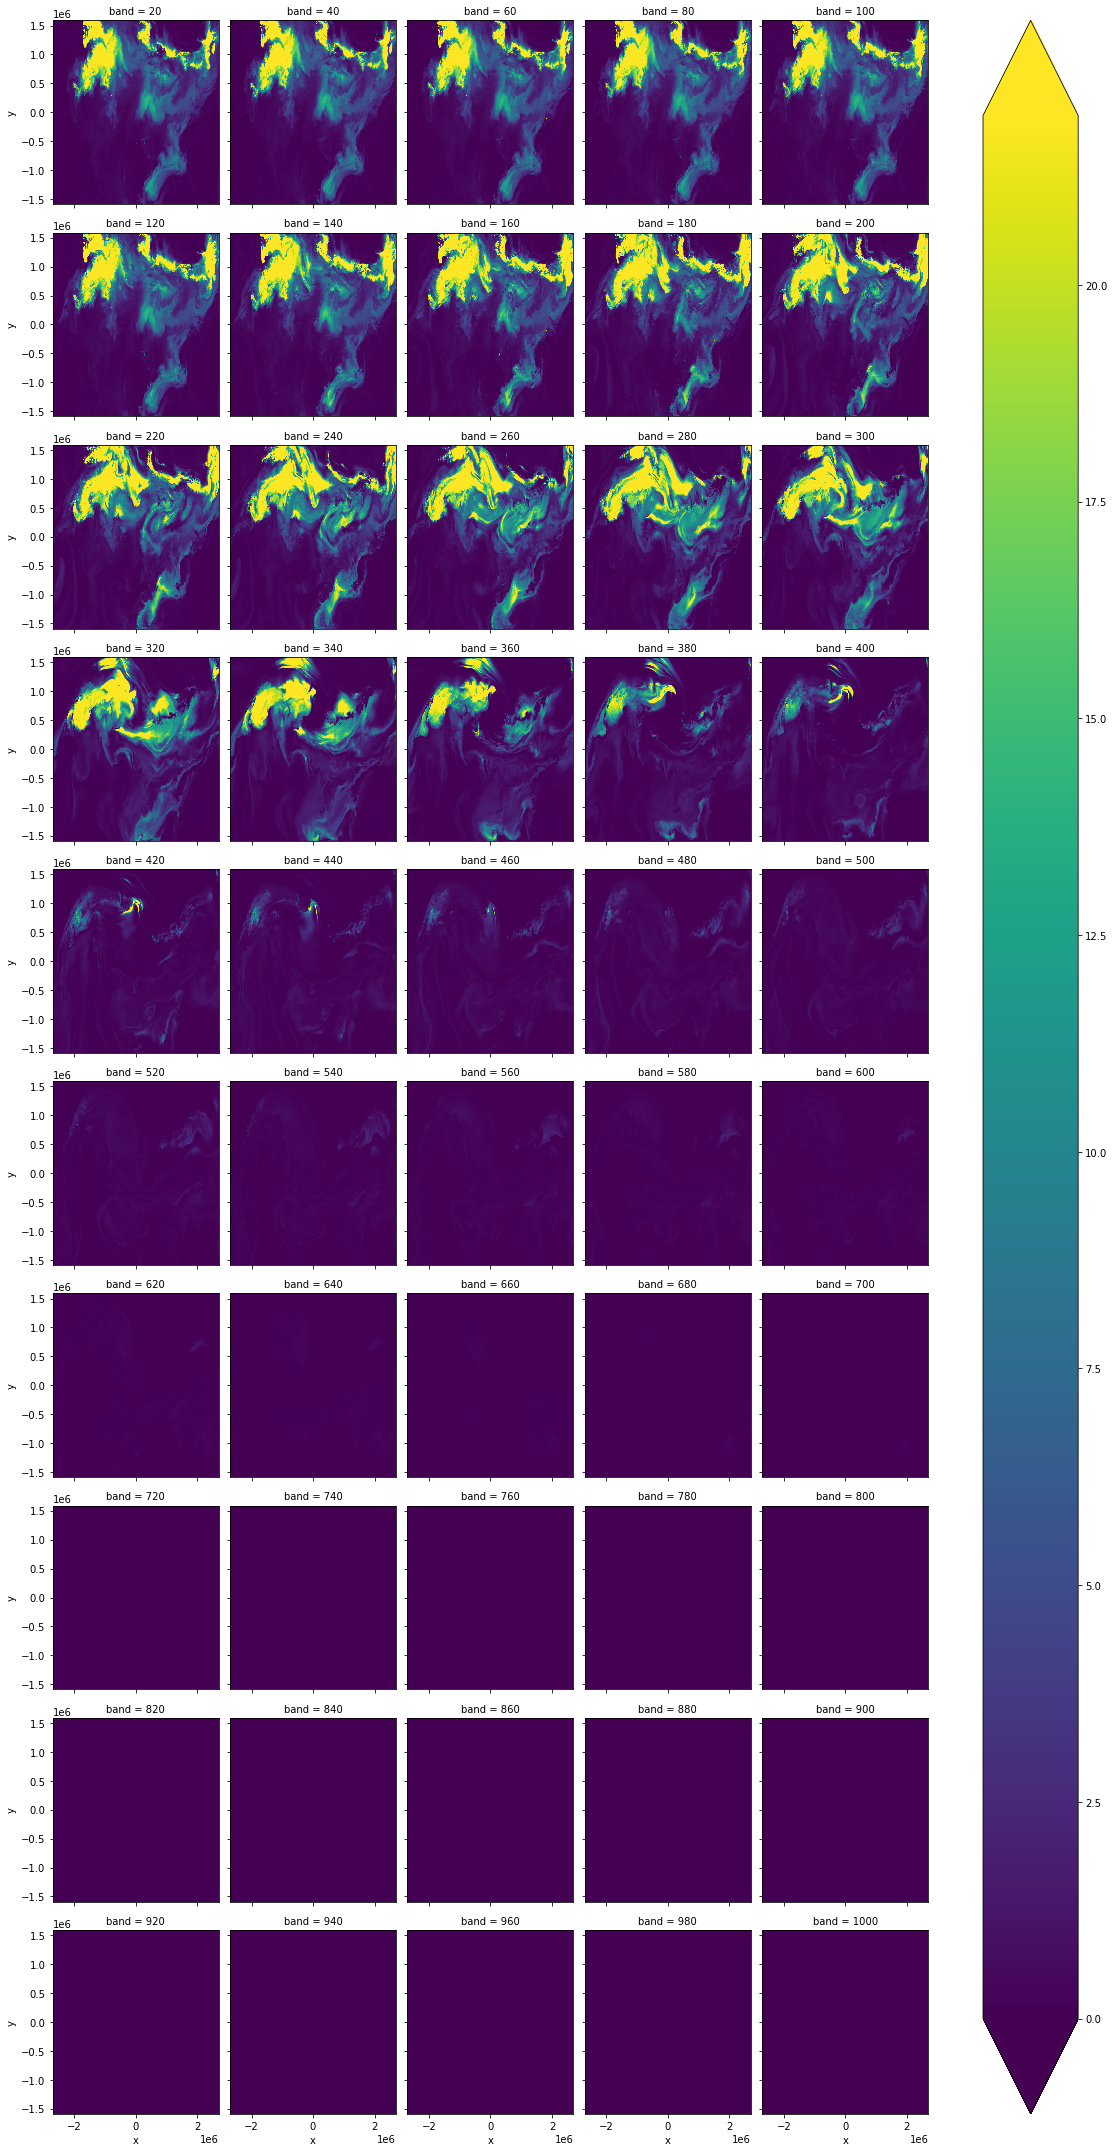

In [5]:
t17z_f00[slice(19, 1000, 20)].plot(x="x", y="y", col="band", col_wrap=5, robust=True)